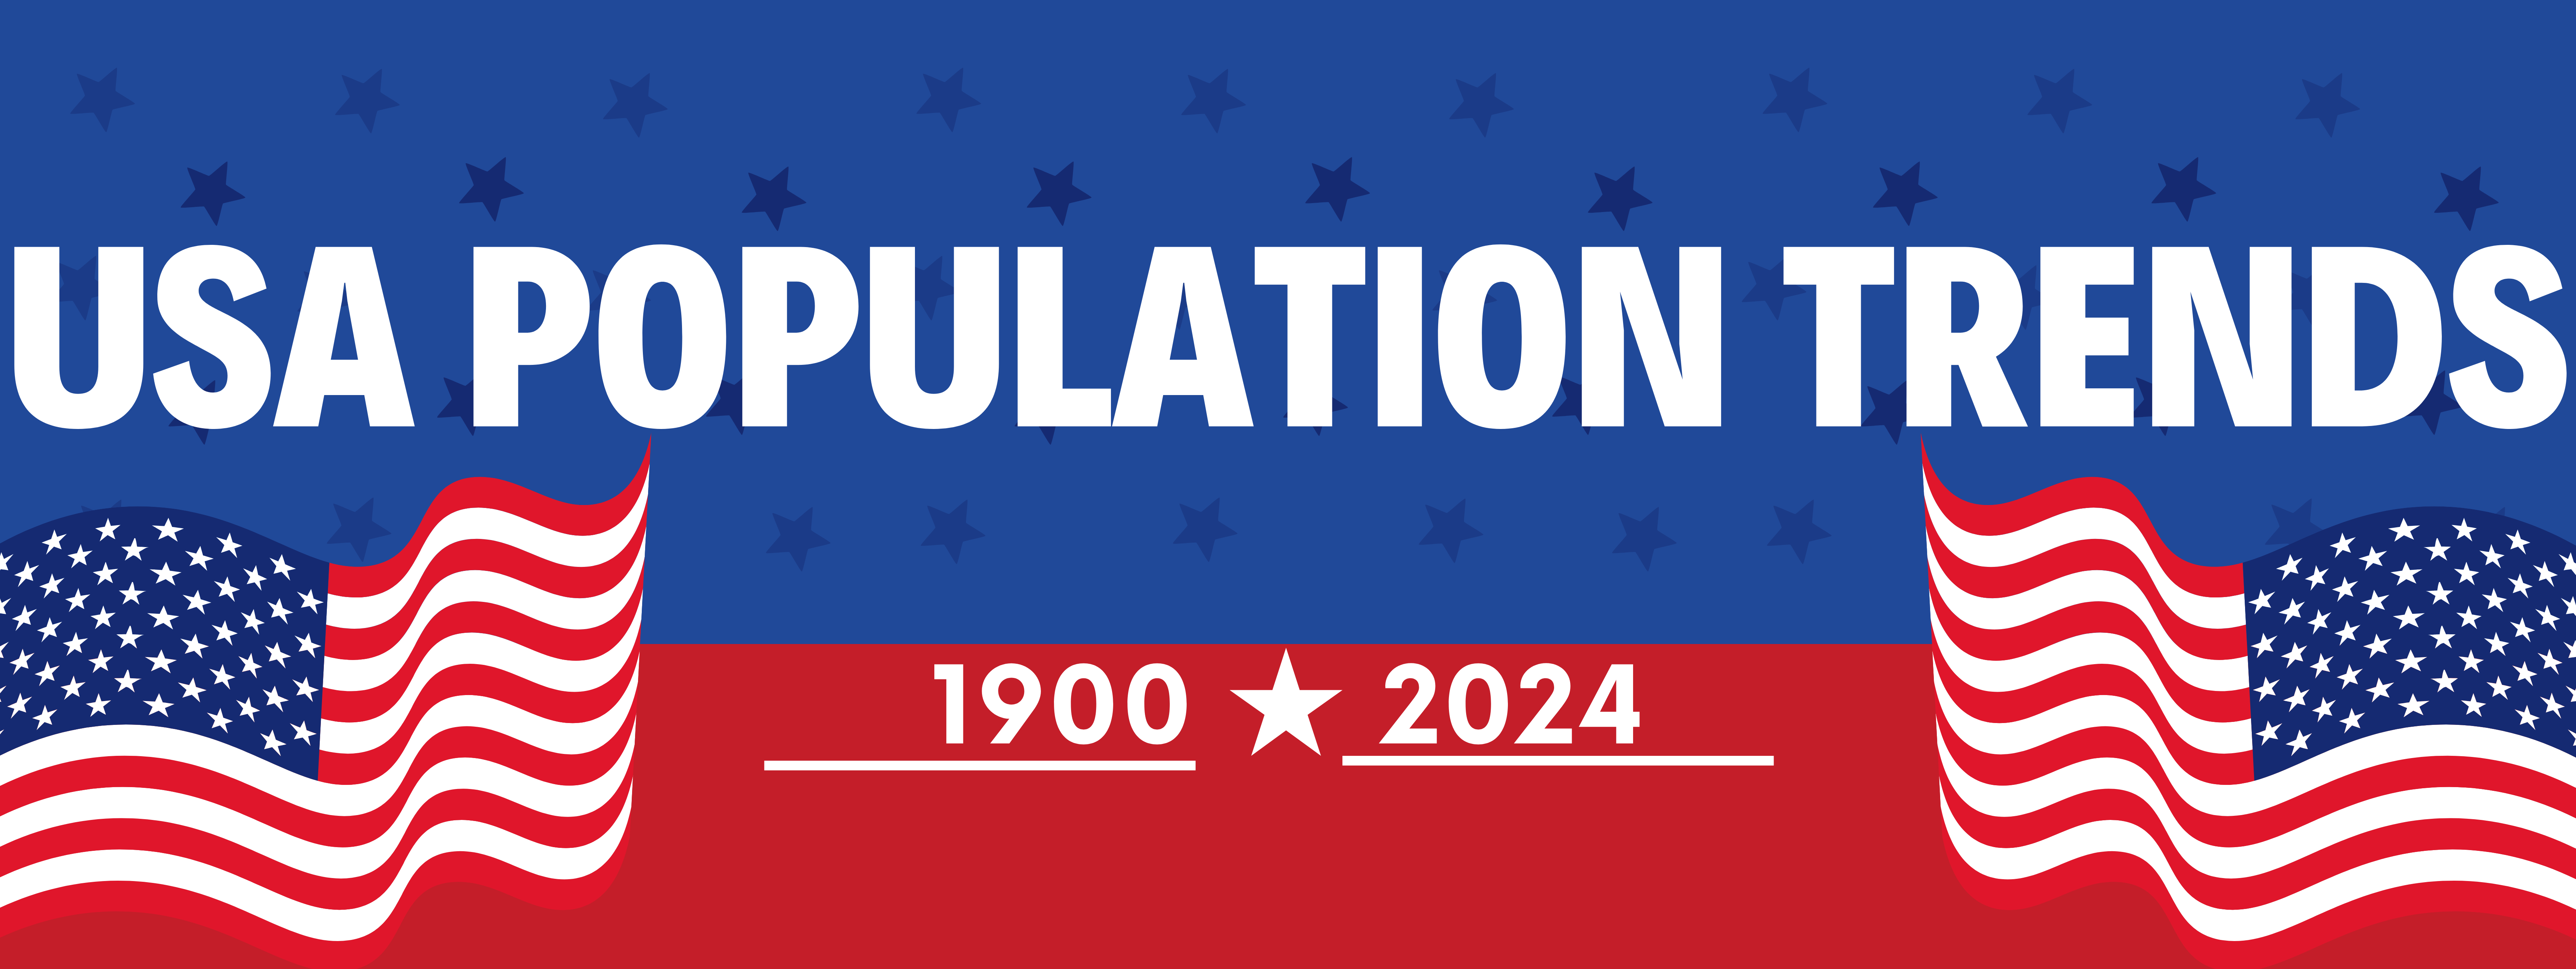

## **USA POPULATION DASHBOARD**

- 📍 Exploring US Population Trends: A Data-Driven Story.
- 🌎 How Has the US Population Changed Over the Years?.
- Welcome to this interactive journey! We'll use maps and charts to explore how population varies across US states and how it has evolved over time.


We will start by installing the required libraries

In [1]:
!pip install pandas plotly dash jupyter-dash

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00
  Created wheel for stringcase: filename=stringcase-1.2.0-py3-none-any.whl size=3568 sha256=97e2973863576fbed6e9b65935d2c77781963a316f82ceb7832681771814676e
  Stored in directory: /root/.cache/pip/wheels/b4/33/6d/d0820be98063da218c3206fbad2381cd2db3fbb1a0f0d254b5
Successfully built stringcase
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


The other thing that we need is the data, we are getting the data from an open source. We will use the data in the map and visualize it.

In [2]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/JoshData/historical-state-population-csv/refs/heads/primary/historical_state_population_by_year.csv", names = ['state', 'year', 'population'])
df

,state,year,population
0,AK,1950,135000
1,AK,1951,158000
2,AK,1952,189000
3,AK,1953,205000
4,AK,1954,215000
...,...,...,...
6270,WY,2020,577681
6271,WY,2021,579636
6272,WY,2022,581978
6273,WY,2023,585067


**FUN** **FACT** 🧠💡


DID YOU KNOW THAT CARLIFORNIA IS THE MOST POPULATED STATE IN USA AT AROUND 40 MILLION PEOPLE.

Now lets make a map, some few lines of magic and vuala! we have an interactive map

In [4]:
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output

# Load your data from CSV (replace the filename with your actual file)
# df = pd.read_csv('your_state_population_data.csv')

# Preprocessing: Ensure state abbreviations are uppercase
df['state'] = df['state'].str.upper()

# Create Dash app
app = Dash(__name__)

# App layout with a dropdown for year selection
app.layout = html.Div([
    html.H1("US State Population Dashboard",
            style={'textAlign': 'center', 'marginBottom': '20px'}),

    # Dropdown to select the year
    html.Div([
        dcc.Dropdown(
            id='year-dropdown',
            options=[{'label': str(year), 'value': year} for year in sorted(df['year'].unique())],
            value=df['year'].max(),  # Default to the most recent year
            clearable=False,
            style={'width': '200px'}
        )
    ], style={'textAlign': 'center', 'marginBottom': '20px'}),

    # Graph components for the map and the trend
    dcc.Graph(id='state-population-map'),
    dcc.Graph(id='state-population-trend')
])

# Callback to update the choropleth map based on the selected year
@app.callback(
    Output('state-population-map', 'figure'),
    Input('year-dropdown', 'value')
)
def update_map(selected_year):
    filtered_data = df[df['year'] == selected_year]
    fig = px.choropleth(
        filtered_data,
        locations='state',
        locationmode="USA-states",
        color='population',
        scope="usa",
        color_continuous_scale="RdYlGn_r",  # Green for low, Red for high
        title=f'US State Populations in {selected_year}'
    )
    fig.update_layout(
        geo_scope='usa',
        height=600
    )
    return fig

# Callback to update the trend graph based on clicking a state in the map
@app.callback(
    Output('state-population-trend', 'figure'),
    Input('state-population-map', 'clickData')
)
def update_trend(clickData):
    if clickData:
        # Extract the state abbreviation from the clicked point
        selected_state = clickData['points'][0]['location']
    else:
        # Default to the first state if no click has occurred
        selected_state = df['state'].unique()[0]

    state_data = df[df['state'] == selected_state]
    fig = px.line(
        state_data,
        x='year',
        y='population',
        title=f'Population Trend for {selected_state}'
    )
    fig.update_layout(
        height=400,
        title_x=0.5
    )
    return fig

if __name__ == '__main__':
    app.run(debug=True)


<IPython.core.display.Javascript object>

## 🧐 What Do the Trends Tell Us?
- Some states have **rapid growth**, while others remain stable.
- Are people moving from one state to another?
- How does population growth align with **economic and migration trends**?

Let's click on different states to analyze their trends! 📊


## 🏁 Final Thoughts
This interactive visualization has shown how **US state populations** have changed over time.

- 🌟 Some states are booming with people.  
- 🌍 Others are losing population due to migration patterns.  
- 🔍 What other factors influence these changes?  

Population data helps policymakers, businesses, and researchers make **data-driven decisions**!  
